In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(4)

In [2]:
data = np.loadtxt('Datasets/MiniBatch.csv', delimiter = ',')
X = data[:,:-1]
y = data[:,-1]

In [3]:
X.shape

(100, 1)

In [4]:
y.shape

(100,)

In [12]:
# Implement a gradient descent step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.

def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    # Compute Error
    y_pred = np.matmul(X,W) + b
    error = y - y_pred
    
    # Compute Update
    W_new = W + learn_rate * np.matmul(error,X)
    b_new = b + learn_rate * error.sum()
    
    return W_new, b_new

In [13]:
# The parts of the script process gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.

def miniBatchGD(X, y, batch_size=20, learn_rate=0.005, num_iter=25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # Coefficients
    b = 0 # Intercept
    
    # Run Iterations
    regression_coef = [np.hstack((W,b))]
    
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch, :]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    return regression_coef

In [14]:
regression_coef = miniBatchGD(X, y)
regression_coef

[array([0., 0.]),
 array([0.00208407, 0.18186785]),
 array([0.08690302, 0.36599428]),
 array([0.10719991, 0.51073735]),
 array([0.08942325, 0.63163154]),
 array([0.14395836, 0.7790679 ]),
 array([0.1630365 , 0.89709561]),
 array([0.19288511, 1.01694493]),
 array([0.22810278, 1.11472289]),
 array([0.26366828, 1.20426275]),
 array([0.29227324, 1.2807212 ]),
 array([0.26693173, 1.34541373]),
 array([0.27341089, 1.40323217]),
 array([0.29680832, 1.46972327]),
 array([0.31766855, 1.51850243]),
 array([0.34296787, 1.56007557]),
 array([0.37183037, 1.61734584]),
 array([0.38266527, 1.63755623]),
 array([0.4091309 , 1.67701349]),
 array([0.39433164, 1.71043494]),
 array([0.38758359, 1.76477677]),
 array([0.40831973, 1.79317094]),
 array([0.43212495, 1.81340403]),
 array([0.44199525, 1.8310852 ]),
 array([0.4311953 , 1.85456198]),
 array([0.43332345, 1.85922911])]

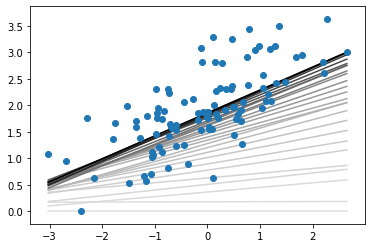

In [15]:
plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W,b in regression_coef:
    counter -= 1
    color = [1-0.92**counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min*W + b, X_max*W + b], color = color)
plt.scatter(X, y, zorder=3)
plt.show()